In [1]:
import numpy as np
# from nibabel.testing import data_path
import matplotlib.image as mpimg
%matplotlib inline
import matplotlib.pyplot as plt

import SimpleITK as sitk
import nibabel as nib

In [17]:
img = nib.load("/Users/Alto/Desktop/brainweb/t1_icbm_normal_1mm_pn3_rf20.mnc")
img_data1 = img.get_data()

# img2 = nib.load("/Users/Alto/Desktop/Project/group2/01/01_mr_tal.mnc")
# img_data2 = img2.get_data()

print(img_data1.shape)
# print(img_data2.shape)

(181, 217, 181)


In [24]:
img = nib.load("/Users/Alto/Desktop/Project/output/mr_orig/10.mnc")
img_data1 = img.get_data()

img2 = nib.load("/Users/Alto/Desktop/Project/output/us_orig/10.mnc")
img_data2 = img2.get_data()

print(img_data1.shape)
print(img_data2.shape)

(378, 466, 1)
(371, 366, 1)


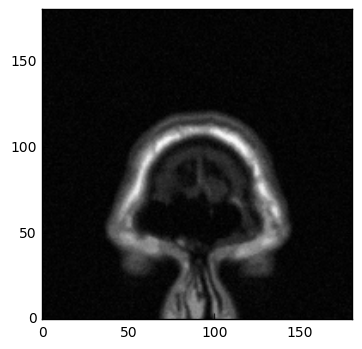

In [6]:
imgplot = plt.imshow(img_data1[:,200,:], cmap="gray", origin="lower")

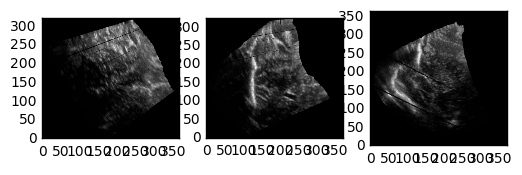

In [28]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

# Ultrasound slices
slice_0 = img_data1[186, :, :]
slice_1 = img_data1[:, 233, :]
slice_2 = img_data1[:, :, 200]
show_slices([slice_0, slice_1, slice_2]) 

In [4]:
slice_0.ndim

2

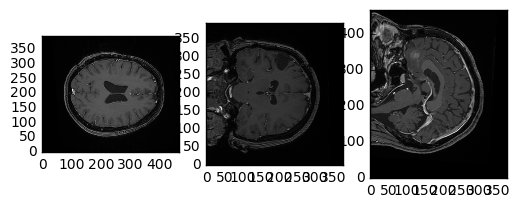

In [29]:
# MRI Slices
slice_0 = img_data2[186, :, :]
slice_1 = img_data2[:, 233, :]
slice_2 = img_data2[:, :, 200]
show_slices([slice_0, slice_1, slice_2]) 

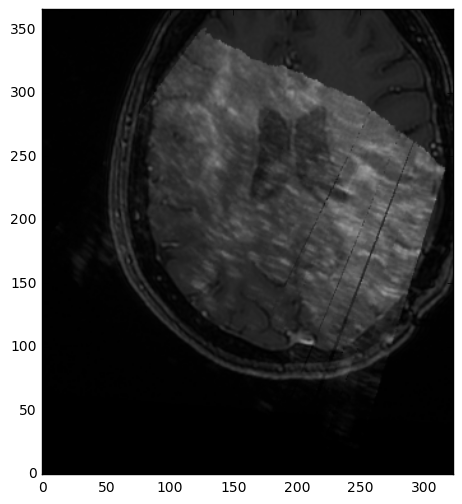

In [7]:
# Overlay US over MRI
slice_0 = img_data2[186, :, :]
slice_1 = img_data2[:, 233, :]
slice_2 = img_data2[:, :, 200]
slice_00 = img_data1[186, :, :]
plt.figure(figsize=(6,6))
imgplot = plt.imshow(slice_0, cmap="gray", origin="lower")
plt.imshow(slice_00, cmap='gray', alpha=0.5,origin="lower")

In [36]:
# Save slices to file

from PIL import Image
I = slice_00
I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

img = Image.fromarray(I8)
img.save("style.png")